In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muktaarvindmahamuni","key":"0cf436d04e85083f6c575b2a9dae9e58"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Downloading Dataset from Kaggle

In [3]:
!kaggle datasets download -d nelgiriyewithana/global-weather-repository

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
License(s): other
 86% 4.00M/4.64M [00:00<00:00, 34.4MB/s]
100% 4.64M/4.64M [00:00<00:00, 36.0MB/s]


In [4]:
!unzip global-weather-repository.zip

Archive:  global-weather-repository.zip
  inflating: GlobalWeatherRepository.csv  
  inflating: state.db                


In [5]:
import pandas as pd

df = pd.read_csv("GlobalWeatherRepository.csv")


Exploring Dataset

In [6]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [7]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')
Categorical Columns: Index(['country', 'location_name', 'timezone', 'last_updated',
       'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase'],
      dtype='object')


##Dataset Cleaning and Preprocessing

(1) Checking missing values and handling them if any

In [9]:
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [10]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [11]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


(2) Detecting Outliers and removing them if any in specific required columns

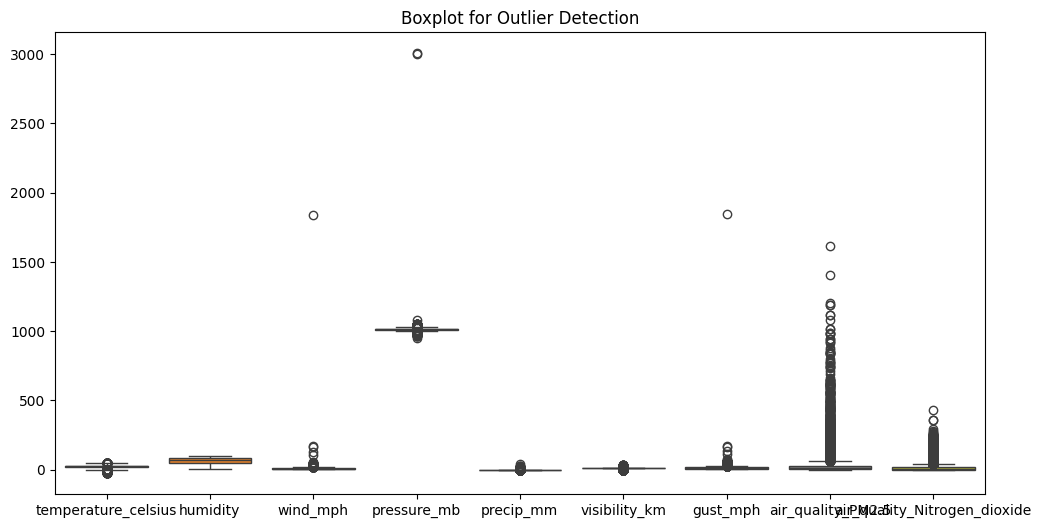

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['temperature_celsius', 'humidity', 'wind_mph', 'pressure_mb', 'precip_mm',
                   'visibility_km', 'gust_mph', 'air_quality_PM2.5', 'air_quality_Nitrogen_dioxide']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [13]:
weather_columns = ['temperature_celsius', 'humidity', 'wind_mph', 'pressure_mb', 'precip_mm',
                   'visibility_km', 'gust_mph', 'air_quality_PM2.5', 'air_quality_Nitrogen_dioxide']

for col in weather_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1715849100,2024-05-16 04:45,26.0,78.8,Partly cloudy,...,1.2,4.5,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1715849100,2024-05-16 05:45,8.0,46.4,Clear,...,4.0,5.3,1,1,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,55
8,Australia,Canberra,-35.28,149.22,Australia/Sydney,1715849100,2024-05-16 18:45,9.0,48.2,Clear,...,3.7,5.4,1,1,06:52 AM,05:07 PM,01:31 PM,No moonset,Waxing Gibbous,55
9,Austria,Vienna,48.20,16.37,Europe/Vienna,1715849100,2024-05-16 10:45,16.0,60.8,Partly cloudy,...,3.7,4.4,1,1,05:14 AM,08:29 PM,01:00 PM,02:42 AM,Waxing Gibbous,55


(3) Applying Min-Max Normalization for numerical columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

##Exploratory Data Analysis

(1) Plotting Correlation Matrix

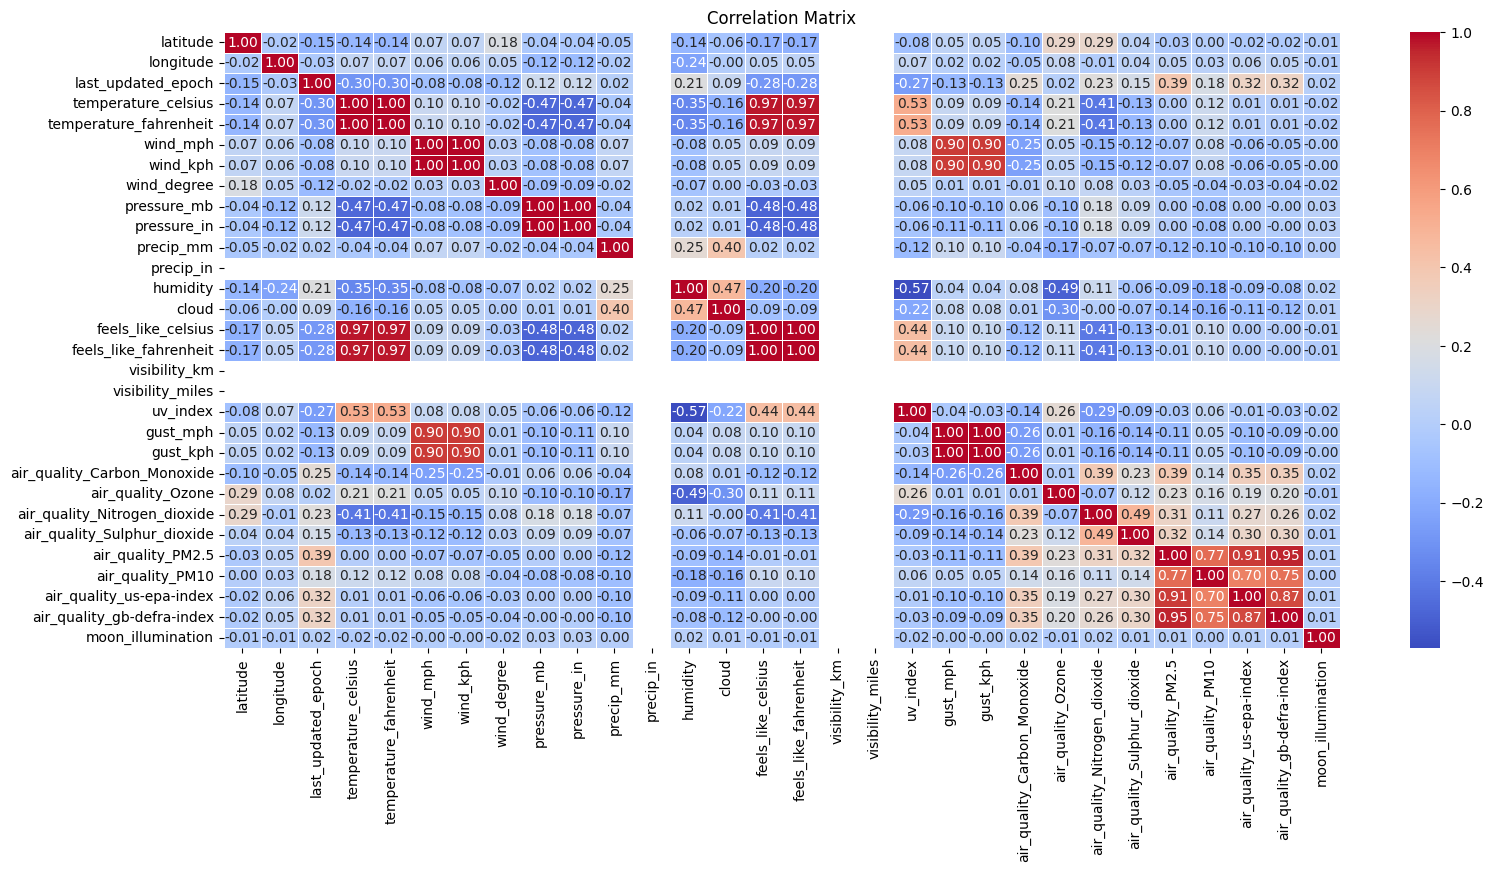

In [14]:
plt.figure(figsize=(18,8))
sns.heatmap(df[num_cols].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

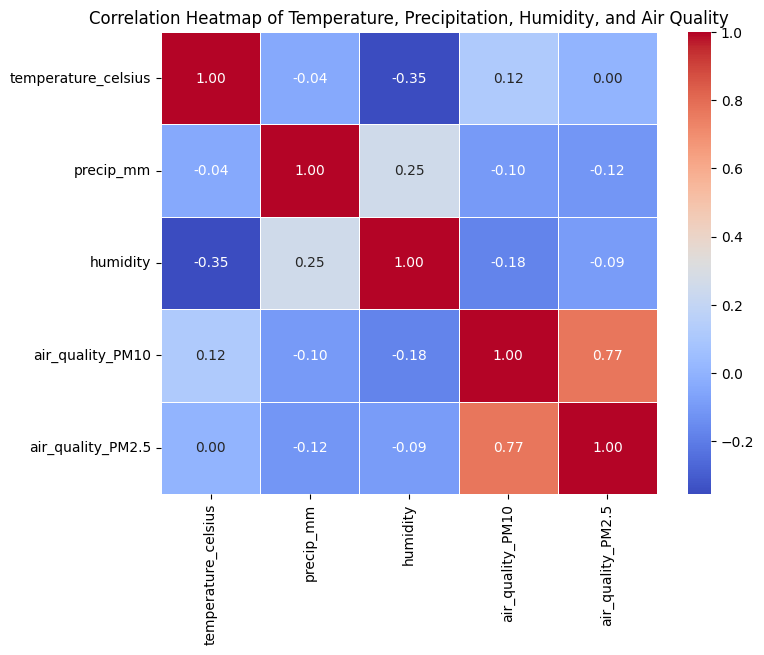

In [ ]:
corr_matrix = df[['temperature_celsius', 'precip_mm', 'humidity', 'air_quality_PM10', 'air_quality_PM2.5']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Temperature, Precipitation, Humidity, and Air Quality')
plt.show()

(2) Trend Analysis (Temperature and Precipitation Over Time)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


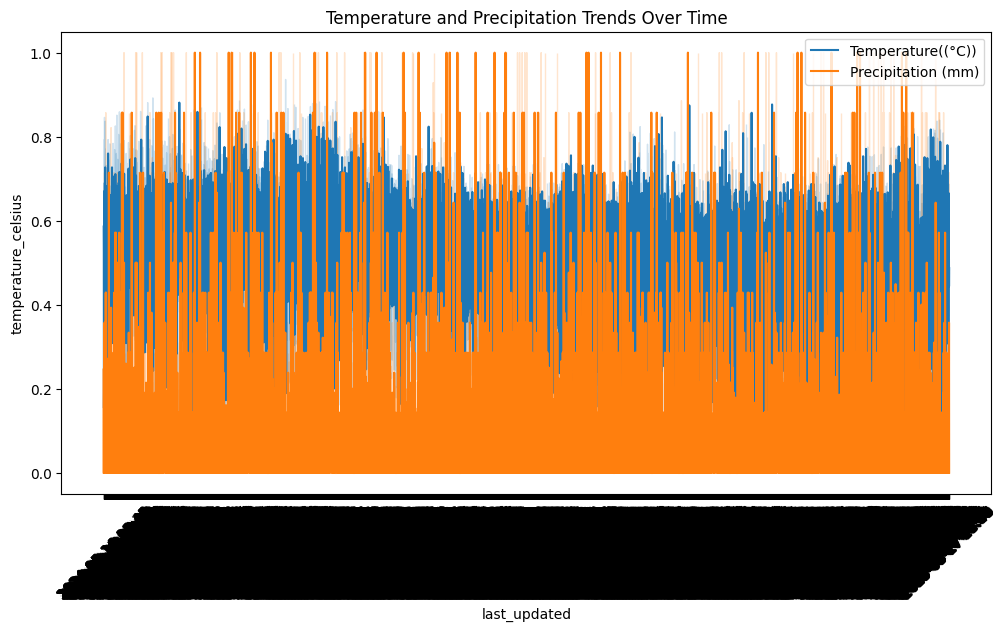

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='last_updated', y='temperature_celsius', label='Temperature((°C))')
sns.lineplot(data=df, x='last_updated', y='precip_mm', label='Precipitation (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.title("Temperature and Precipitation Trends Over Time")
plt.show()

(3) Seasonal Patterns

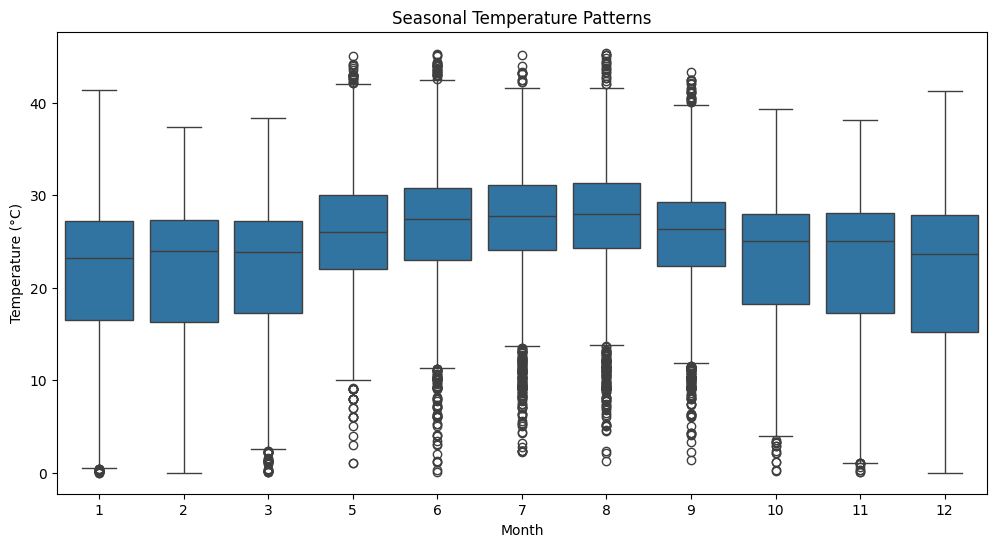

In [ ]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

df['month'] = df['last_updated'].dt.month
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='temperature_celsius', data=df)
plt.title('Seasonal Temperature Patterns')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

(4) Rolling mean/moving average

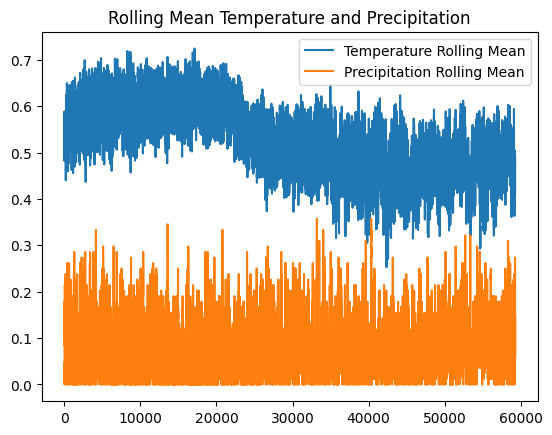

In [ ]:
df['temp_rolling_mean'] = df['temperature_celsius'].rolling(window=12).mean()
df['precip_rolling_mean'] = df['precip_mm'].rolling(window=12).mean()

plt.plot(df['temp_rolling_mean'], label='Temperature Rolling Mean')
plt.plot(df['precip_rolling_mean'], label='Precipitation Rolling Mean')
plt.legend()
plt.title('Rolling Mean Temperature and Precipitation')
plt.show()

(5) Seasonal Decomposition

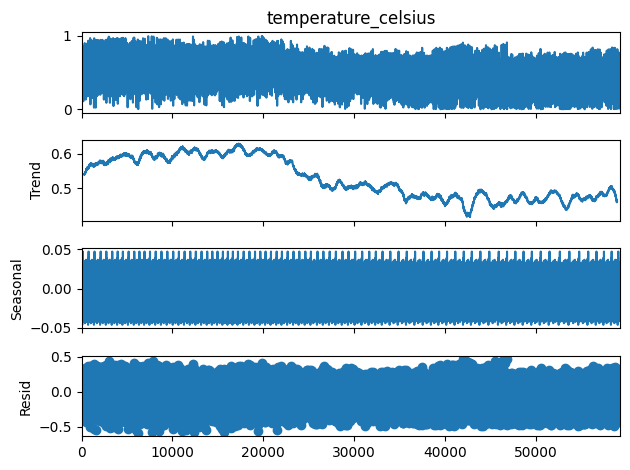

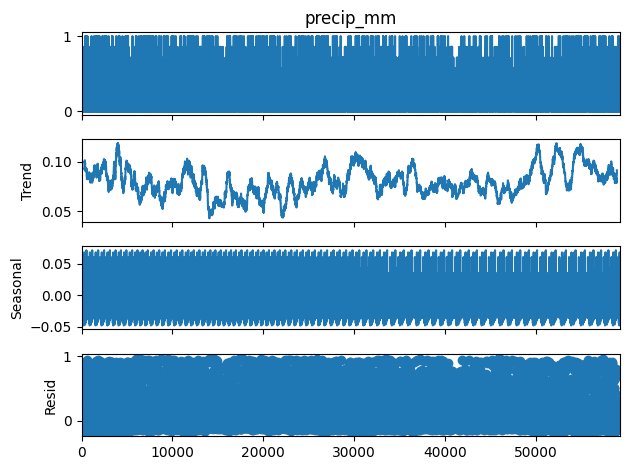

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_temp = seasonal_decompose(df['temperature_celsius'], model='additive', period=365)
result_precip = seasonal_decompose(df['precip_mm'], model='additive', period=365)

result_temp.plot()
result_precip.plot()
plt.show()

## Model Building

In [15]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [16]:
df['last_updated'] = pd.to_datetime(df['last_updated_epoch'], unit='s')
df.set_index('last_updated', inplace=True)
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 08:45:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,26.6,79.8,Partly Cloudy,8.3,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
2024-05-16 08:45:00,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1715849100,26.0,78.8,Partly cloudy,5.6,...,1.2,4.5,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55
2024-05-16 08:45:00,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1715849100,8.0,46.4,Clear,2.2,...,4.0,5.3,1,1,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,55
2024-05-16 08:45:00,Australia,Canberra,-35.28,149.22,Australia/Sydney,1715849100,9.0,48.2,Clear,2.5,...,3.7,5.4,1,1,06:52 AM,05:07 PM,01:31 PM,No moonset,Waxing Gibbous,55
2024-05-16 08:45:00,Austria,Vienna,48.20,16.37,Europe/Vienna,1715849100,16.0,60.8,Partly cloudy,12.5,...,3.7,4.4,1,1,05:14 AM,08:29 PM,01:00 PM,02:42 AM,Waxing Gibbous,55


Temperature Prediction Model using XGBoost Regressor with Categorical Data Encoding

In [17]:
!pip install xgboost


In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame
# Dropping any non-numeric columns except the target column
X = df.drop(columns=['temperature_celsius'])  # Assuming temperature_celsius is the target column
y = df['temperature_celsius']

# List of categorical columns to encode
categorical_cols = ['country', 'location_name', 'timezone', 'condition_text', 'wind_direction',
                    'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase']

# Applying OneHotEncoder to categorical columns with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', X.select_dtypes(include=['float64', 'int64']).columns)  # Keeps numerical columns as is
    ])

# Creating the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.07877390076352846
MAE: 0.038740685867749675


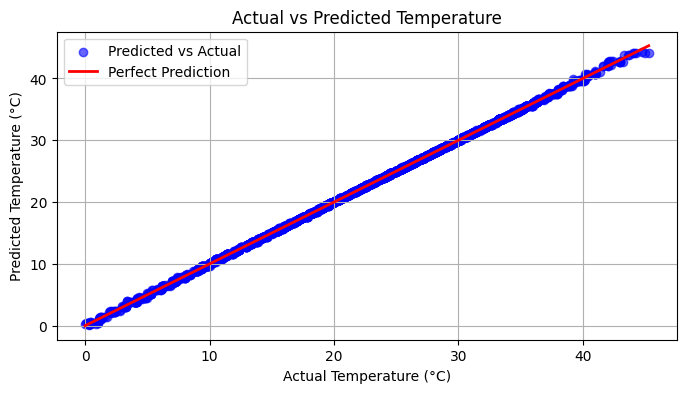

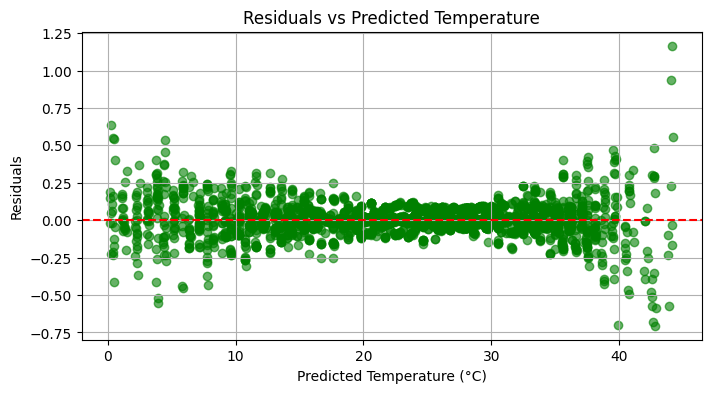

In [19]:
# Plottig actual vs predicted temperature values
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

# plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Temperature')
plt.grid(True)
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Since sklearn returns negative RMSE, we take the absolute value
cv_scores = -cv_scores
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Average CV RMSE: {cv_scores.mean():.4f}")


Cross-Validation RMSE Scores: [0.12832786 0.10188249 0.06019334 0.11322581 0.13489323]
Average CV RMSE: 0.1077


XGBoost Model for Temperature Prediction Using Time Series Data

In [21]:
# Sorting the data by the index (which is 'last_updated') to ensure time order
df.sort_index(inplace=True)

# Set the split point (e.g., 80% for training and 20% for testing)
# Convert the DatetimeIndex to numerical representation using to_series()
split_date = df.index.to_series().quantile(0.8)

# Split the data based on the date
train = df[df.index <= split_date]
test = df[df.index > split_date]

X_train = train.drop(columns=['temperature_celsius'])
y_train = train['temperature_celsius']
X_test = test.drop(columns=['temperature_celsius'])
y_test = test['temperature_celsius']

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.13741453002508378
MAE: 0.05762168763749589


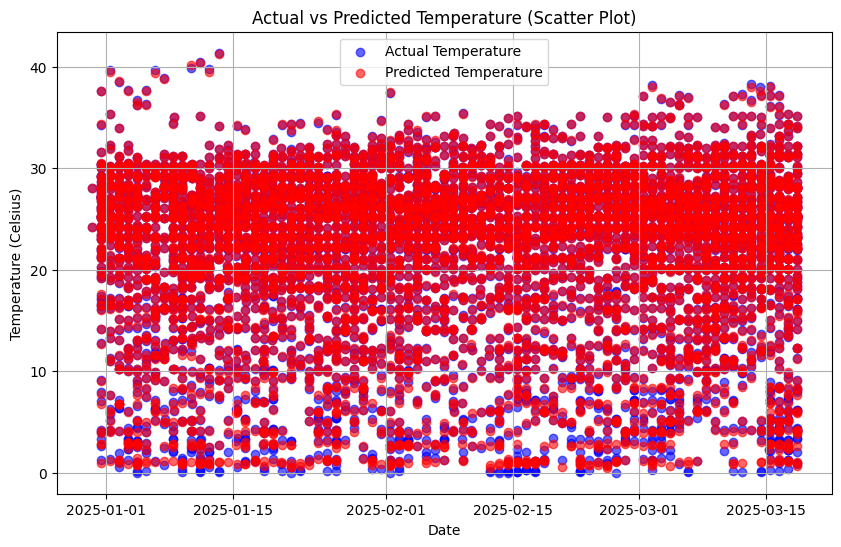

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual Temperature', color='blue', alpha=0.6)
plt.scatter(y_test.index, y_pred, label='Predicted Temperature', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Actual vs Predicted Temperature (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()


## Advanced EDA

(1) Implementing Anomaly Detection to Identify and Analyze Outliers

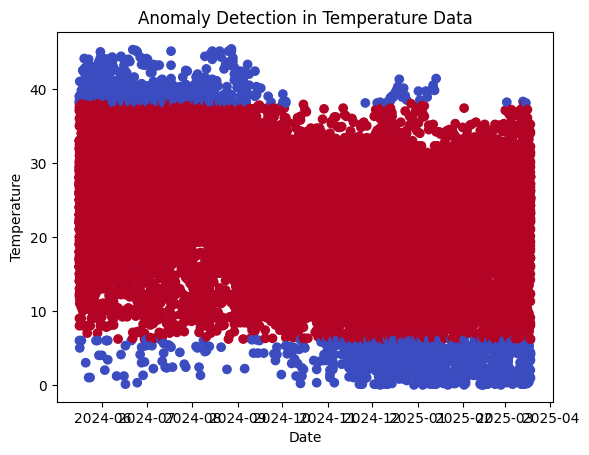

In [23]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Example: Detecting anomalies in temperature
model = IsolationForest(contamination=0.05)  # 5% of data are assumed outliers
df['anomaly'] = model.fit_predict(df[['temperature_celsius']])

# Visualize anomalies
# Use df.index instead of df['last_updated'] as 'last_updated' is now the index
plt.scatter(df.index, df['temperature_celsius'], c=df['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

## Unique Analysis

1. Show only Top N countries by average temperature

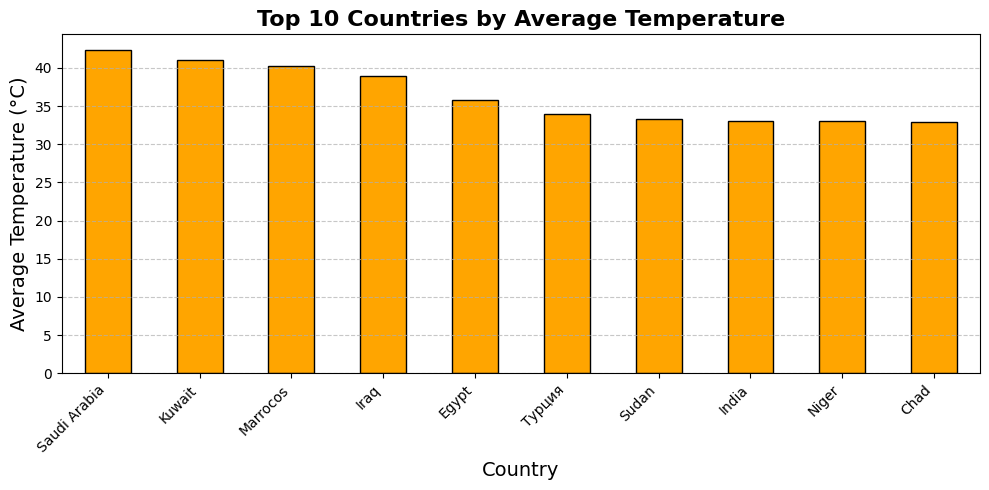

In [28]:
# Calculate average temperature for each country
country_temperature = df.groupby('country')['temperature_celsius'].mean()

# Top 10 countries by average temperature
top_countries = country_temperature.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Countries by Average Temperature', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2. For the temperature plot:

"Geographical Distribution of Temperature (°C)"
For the air quality (PM2.5) plot:

"Geographical Distribution of PM2.5 Air Quality"

<Figure size 1200x800 with 0 Axes>

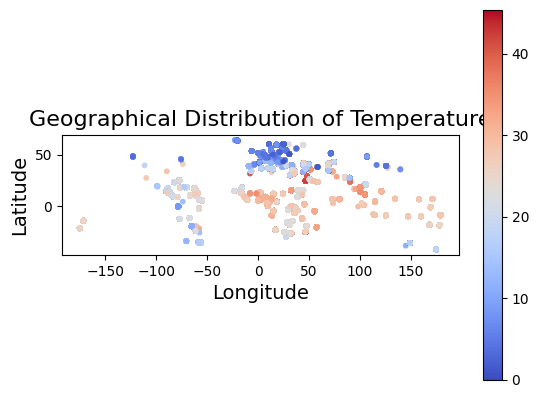

<Figure size 1200x800 with 0 Axes>

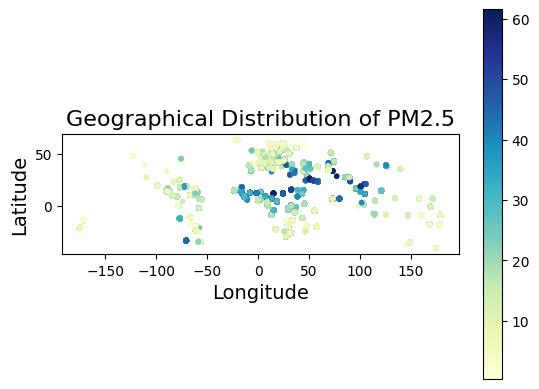

In [25]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from latitude and longitude
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']),
                       crs="EPSG:4326")

# Plot the geographical distribution of temperature
plt.figure(figsize=(12, 8))
gdf.plot(column='temperature_celsius', cmap='coolwarm', legend=True, markersize=10)
plt.title('Geographical Distribution of Temperature', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

# Plot the geographical distribution of air quality (PM2.5 as an example)
plt.figure(figsize=(12, 8))
gdf.plot(column='air_quality_PM2.5', cmap='YlGnBu', legend=True, markersize=10)
plt.title('Geographical Distribution of PM2.5', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()


3. Correlation Between Air Quality and Weather Parameters

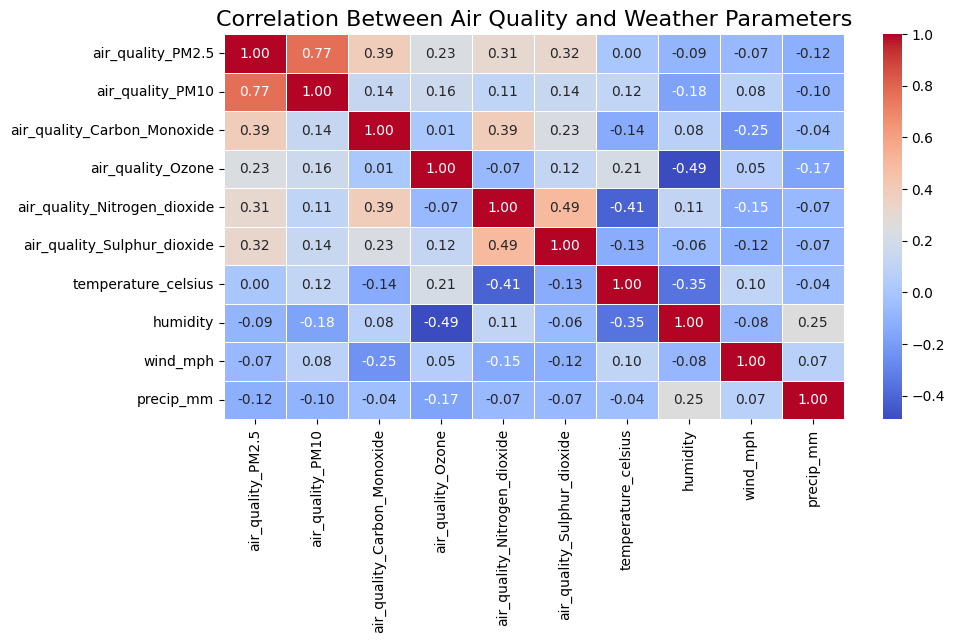

In [26]:
# Calculate the correlation matrix for air quality and weather parameters
air_quality_columns = ['air_quality_PM2.5', 'air_quality_PM10', 'air_quality_Carbon_Monoxide',
                       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide']

weather_columns = ['temperature_celsius', 'humidity', 'wind_mph', 'precip_mm']

# Combine the relevant columns for correlation analysis
correlation_data = df[air_quality_columns + weather_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Air Quality and Weather Parameters', fontsize=16)
plt.show()
